#Assessment 3


Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



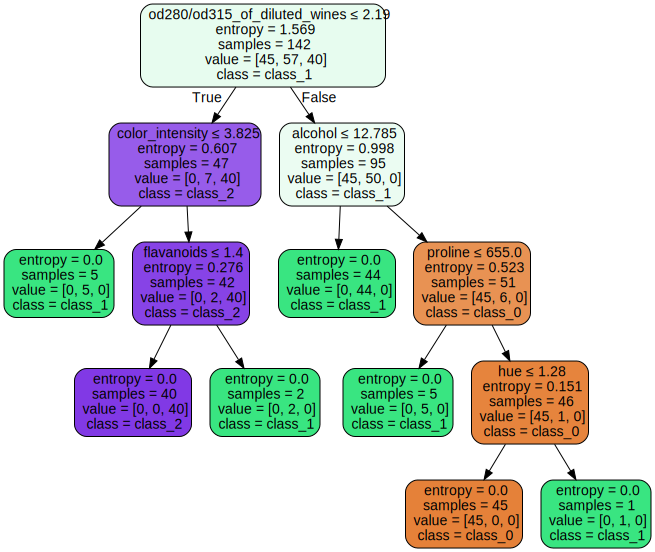

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

# Load wine data
data = load_wine()

# Dictionary creation with the data keys and corresponding values
data_dict = {
    'Alcohol': data.data[:, 0],
    'Malic acid': data.data[:, 1],
    'Ash': data.data[:, 2],
    'Alcalinity of ash': data.data[:, 3],
    'Magnesium': data.data[:, 4],
    'Total phenols': data.data[:, 5],
    'Flavanoids': data.data[:, 6],
    'Nonflavanoid phenols': data.data[:, 7],
    'Proanthocyanins': data.data[:, 8],
    'Color intensity': data.data[:, 9],
    'Hue': data.data[:, 10],
    'OD280/OD315 of diluted wines': data.data[:, 11],
    'Proline': data.data[:, 12],
    'target': data.target
}

# Initialise a pandas DataFrame with the data dictionary
input_df = pd.DataFrame(data_dict)

# Splitting data into training and test sets
train_df, test_df = train_test_split(input_df, test_size=0.2, random_state=42)

# Separate the features and target variable for training
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Create and train the decision tree classifier with 'entropy'
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)


X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

#Test the developed model by passing the test set into the trained decision tree classifier
y_pred = classifier.predict(X_test)

#Checking the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Generate DOT data automatically from the classifier
dot_data = export_graphviz(
    classifier,
    out_file=None,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)
graph.render("output_graph")  # Save the graph as output_graph.pdf

# Display the graph
graph
